<a href="https://colab.research.google.com/github/alik604/Sarcasm-Detection/blob/master/Sarcasm_Detection_alik604's_improvements.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Scarcasm Detection 
- By [manashpratim](https://github.com/manashpratim/Sarcasm-Detection)
-- Improved by [alik604](https://github.com/alik604/ReadMe)

> Can sarcastic sentences be identified?



In [11]:
#Downloading the dataset

# import os

# os.environ['KAGGLE_USERNAME'] = "alik604" # username from the json file os.environ['KAGGLEKEY'] = "xxxxxxxxxxxxxxxxxxxxxxxxxxxx" # key from the json file
# os.environ['KAGGLE_KEY'] = ""

!mkdir /root/.kaggle
!echo '{"username":"alik604","key":""}' > /root/.kaggle/kaggle.json

!kaggle datasets download -d rmisra/news-headlines-dataset-for-sarcasm-detection

!ls

  0% 0.00/3.30M [00:00<?, ?B/s]
100% 3.30M/3.30M [00:00<00:00, 108MB/s]
'archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1577991782&Signature=QpmYla4bKFA22+WS70VxDUMRgklHzf9pflHYagQua5DhjiFOypzq%2FAPQGp5Lmp%2FVjSBvhku8M2ejtHLGqfIhxEAMMCfOdkqK6lyFcawyiXPi1YV2pDJjqAlOBy4TQSMOo'
 download
 news-headlines-dataset-for-sarcasm-detection.zip
 sample_data


In [14]:
# Unzipping the downloaded dataset
import os
import zipfile

local_zip='news-headlines-dataset-for-sarcasm-detection.zip'
zip_ref=zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp/sarcasm')
zip_ref.close()

!ls

'archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1577991782&Signature=QpmYla4bKFA22+WS70VxDUMRgklHzf9pflHYagQua5DhjiFOypzq%2FAPQGp5Lmp%2FVjSBvhku8M2ejtHLGqfIhxEAMMCfOdkqK6lyFcawyiXPi1YV2pDJjqAlOBy4TQSMOo'
 download
 news-headlines-dataset-for-sarcasm-detection.zip
 sample_data


In [0]:
#Opening the json file
import json
rows = []
for line in open('/tmp/sarcasm/Sarcasm_Headlines_Dataset.json', 'r'):
    rows.append(json.loads(line))

In [0]:
#Suffling the data and splitting the data into training and test sets 
import random
SPLIT_SIZE=0.9
suffled_set=random.sample(rows,len(rows))
train_length=int(len(suffled_set)*SPLIT_SIZE)
train_set=suffled_set[:train_length]
test_set=suffled_set[train_length:]

In [17]:
#Data Summary
print('Total length of the dataset: ',len(suffled_set))
print('Length of the Training dataset: ',len(train_set))
print('Length of the Test dataset: ',len(test_set))

Total length of the dataset:  26709
Length of the Training dataset:  24038
Length of the Test dataset:  2671


In [18]:
#Data Format
train_set[1000]

{'article_link': 'https://www.huffingtonpost.com/entry/three-jews-visit-scandinavia_b_5643357.html',
 'headline': 'three jews visit scandinavia',
 'is_sarcastic': 0}

In [0]:
#This list is available at https://github.com/Yoast/YoastSEO.js/blob/develop/src/config/stopwords.js
stopwords=[ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]

In [0]:
#Function to remove stopwords
def remove_stopwords(sentence):
  for word in stopwords:
    token=' '+word+' '
    sentence=sentence.replace(token,' ')
    sentence=sentence.replace('  ',' ')
  return sentence

In [0]:
#Function to get the plain text from the link of an article
def get_article(link):
  try:
    from bs4 import BeautifulSoup
    import urllib.request

    user_agent = 'Mozilla/5.0 (Windows; U; Windows NT 5.1; en-US; rv:1.9.0.7) Gecko/2009021910 Firefox/3.0.7'

    url = link

    headers={'User-Agent':user_agent,} 

    request=urllib.request.Request(url,None,headers) #The assembled request
    response = urllib.request.urlopen(request)
    html= response.read()
    soup = BeautifulSoup(html)

    # kill all script and style elements
    for script in soup(["script", "style"]):
        script.extract()    # rip it out

    # get text
    text = soup.get_text()

    # break into lines and remove leading and trailing space on each
    lines = (line.strip() for line in text.splitlines())
    # break multi-headlines into a line each
    chunks = (phrase.strip() for line in lines for phrase in line.split("  "))
    # drop blank lines
    text = '\n'.join(chunk for chunk in chunks if chunk)
    return ' '.join(text.split())
  except:
    return 'article not available'
    pass
  
 

In [0]:
#Function to separate the articles, headlines and labels from the data
def extract(array):
  
  #articles=[]
  headlines=[]
  labels=[]
  for i in range(len(array)):
    labels.append(array[i]['is_sarcastic'])
    headlines.append(remove_stopwords(array[i]['headline']))
    #articles.append(get_article(array[i]['article_link']))
  #return articles,headlines,labels
  return headlines,labels

In [0]:
#Extracting articles, headlines and labels from the data
#train_articles,train_headlines,train_labels=extract(train_set)
train_headlines,train_labels=extract(train_set)
#test_articles,test_headlines,test_labels=extract(test_set)
test_headlines,test_labels=extract(test_set)

In [0]:
#Preprocessing the training and test headlines for the word embedding
vocab_size = 10000
embedding_dim = 27 # 15
max_length = 120
trunc_type='post'
oov_tok = "<OOV>"

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import * 
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_headlines)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(train_headlines)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)

test_sequences = tokenizer.texts_to_sequences(test_headlines)
test_padded = pad_sequences(test_sequences,maxlen=max_length)

# **CONVOLUTIONAL NEURAL NETWORK (CNN)**

In [0]:
#Building the CNN Model
model_conv = keras.Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    Conv1D(28,4,activation='relu'), # 24 is better 
    MaxPooling1D(2),
    Dropout(0.2),  
   
    Flatten(),
    Dense(8, activation='relu'),
    Dense(1, activation='sigmoid')
])


In [133]:
model_conv.summary()

Model: "sequential_30"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_30 (Embedding)     (None, 120, 28)           280000    
_________________________________________________________________
conv1d_16 (Conv1D)           (None, 117, 28)           3164      
_________________________________________________________________
max_pooling1d_15 (MaxPooling (None, 58, 28)            0         
_________________________________________________________________
dropout_27 (Dropout)         (None, 58, 28)            0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 1624)              0         
_________________________________________________________________
dense_74 (Dense)             (None, 8)                 13000     
_________________________________________________________________
dense_75 (Dense)             (None, 1)               

In [134]:
model_conv.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
num_epochs = 5 # 20 
history=model_conv.fit(padded, train_labels, epochs=num_epochs, validation_data=(test_padded, test_labels))

## Original 
# .99x | .8304 [val acc]       # Orginal 

## Mine 
# # 0.947 | 0.8334 [val acc]       # mark I 
# # 0.920 | 0.8379 [val acc]       # mark II 

Train on 24038 samples, validate on 2671 samples
Epoch 1/5
24038/24038 [==============================] - 8s 332us/sample - loss: 0.5362 - acc: 0.7271 - val_loss: 0.4015 - val_acc: 0.8106
Epoch 2/5
24038/24038 [==============================] - 5s 194us/sample - loss: 0.2963 - acc: 0.8742 - val_loss: 0.3572 - val_acc: 0.8379
Epoch 3/5
24038/24038 [==============================] - 5s 195us/sample - loss: 0.1834 - acc: 0.9286 - val_loss: 0.4053 - val_acc: 0.8315
Epoch 4/5
24038/24038 [==============================] - 5s 195us/sample - loss: 0.1075 - acc: 0.9622 - val_loss: 0.5632 - val_acc: 0.8188
Epoch 5/5
24038/24038 [==============================] - 5s 194us/sample - loss: 0.0617 - acc: 0.9793 - val_loss: 0.6237 - val_acc: 0.8248


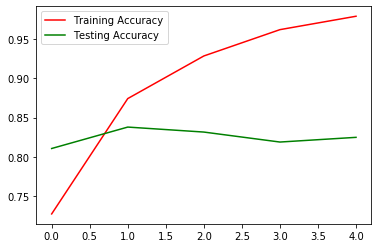

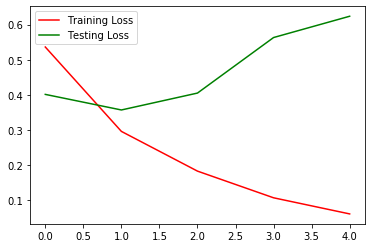

In [144]:
#Evaluating Accuracy and Loss of the model
%matplotlib inline
acc=history.history['acc']
val_acc=history.history['val_acc']
loss=history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(acc)) #No. of epochs

#Plot training and validation accuracy per epoch
import matplotlib.pyplot as plt
plt.plot(epochs,acc,'r',label='Training Accuracy')
plt.plot(epochs,val_acc,'g',label='Testing Accuracy')
plt.legend()
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs,loss,'r',label='Training Loss')
plt.plot(epochs,val_loss,'g',label='Testing Loss')
plt.legend()
plt.show()

# ** Stacked Bidirectional ~GRU~ LSTM **

In [0]:
#Building the GRU Model
model_gru = keras.Sequential([
    Embedding(vocab_size, embedding_dim, input_length=max_length),
    Bidirectional(CuDNNLSTM(28, return_sequences=True)),
    # Dense(28, activation='relu'), # work well, ive never read about this... 
    # Dropout(.3),
    Bidirectional(CuDNNLSTM(20)),

    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [146]:
model_gru.summary() 

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_33 (Embedding)     (None, 120, 28)           280000    
_________________________________________________________________
bidirectional_38 (Bidirectio (None, 120, 56)           12992     
_________________________________________________________________
bidirectional_39 (Bidirectio (None, 40)                12480     
_________________________________________________________________
dense_81 (Dense)             (None, 10)                410       
_________________________________________________________________
dense_82 (Dense)             (None, 1)                 11        
Total params: 305,893
Trainable params: 305,893
Non-trainable params: 0
_________________________________________________________________


In [147]:
model_gru.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
num_epochs = 10
history1=model_gru.fit(padded, train_labels, batch_size=500,epochs=num_epochs, validation_data=(test_padded, test_labels))

## Original 
# acc: 0.9101 | val_acc: 0.8315

## Alik604's 
# acc: 0.8870 | val_acc: 0.83 # CuDNNGRU; speed improvement
# acc: 0.9773 | val_acc: 0.8233 # stacked CuDNNLSTM with dropout
# acc: 0.9267 | val_acc: 0.8311 # stacked CuDNNLSTM with dropout # 5th epoch, batch_size=500, val_loss: 0.4435
# acc: 0.9424 | val_acc: 0.8416 # stacked CuDNNLSTM with dropout # 5th epoch, batch_size=250, val_loss: 0.4340



Train on 24038 samples, validate on 2671 samples
Epoch 1/10
24038/24038 [==============================] - 6s 263us/sample - loss: 0.6744 - acc: 0.5729 - val_loss: 0.6031 - val_acc: 0.7559
Epoch 2/10
24038/24038 [==============================] - 2s 87us/sample - loss: 0.4099 - acc: 0.8282 - val_loss: 0.3902 - val_acc: 0.8326
Epoch 3/10
24038/24038 [==============================] - 2s 87us/sample - loss: 0.2638 - acc: 0.8995 - val_loss: 0.3893 - val_acc: 0.8259
Epoch 4/10
24038/24038 [==============================] - 2s 87us/sample - loss: 0.2031 - acc: 0.9289 - val_loss: 0.4362 - val_acc: 0.8214
Epoch 5/10
24038/24038 [==============================] - 2s 87us/sample - loss: 0.1684 - acc: 0.9439 - val_loss: 0.4556 - val_acc: 0.8293
Epoch 6/10
24038/24038 [==============================] - 2s 87us/sample - loss: 0.1336 - acc: 0.9588 - val_loss: 0.4831 - val_acc: 0.8289
Epoch 7/10
24038/24038 [==============================] - 2s 87us/sample - loss: 0.1088 - acc: 0.9676 - val_loss: 0.

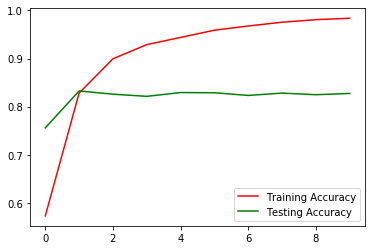

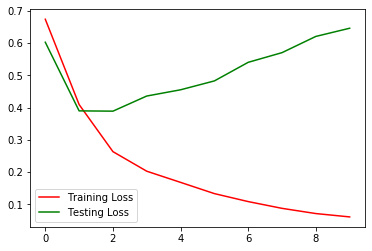

In [149]:
#Evaluating Accuracy and Loss of the model
%matplotlib inline
acc=history1.history['acc']
val_acc=history1.history['val_acc']
loss=history1.history['loss']
val_loss=history1.history['val_loss']

epochs=range(len(acc)) #No. of epochs

#Plot training and validation accuracy per epoch
import matplotlib.pyplot as plt
plt.plot(epochs,acc,'r',label='Training Accuracy')
plt.plot(epochs,val_acc,'g',label='Testing Accuracy')
plt.legend()
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs,loss,'r',label='Training Loss')
plt.plot(epochs,val_loss,'g',label='Testing Loss')
plt.legend()
plt.show()

# **Bidirectional ~LSTM~ ConvLSTM2D (experiment) **

In [0]:
#Building the LSTM Model
model_lstm = keras.Sequential([
    # Embedding(vocab_size, embedding_dim, input_length=max_length),
    Bidirectional(ConvLSTM2D(28,(1,1))),
    Dense(6, activation='relu'),
    Dense(1, activation='sigmoid')
])


In [170]:
padded

array([[   0,    0,    0, ...,  574, 1284,    1],
       [   0,    0,    0, ..., 3258,  676, 3259],
       [   0,    0,    0, ...,  575, 1323, 6385],
       ...,
       [   0,    0,    0, ...,  609, 1667, 3206],
       [   0,    0,    0, ..., 8093,    1, 5455],
       [   0,    0,    0, ...,  249,  167,  167]], dtype=int32)

In [169]:
model_lstm.summary()

ValueError: ignored

In [0]:
model_lstm.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
num_epochs = 20
history2=model_lstm.fit(padded, train_labels, batch_size=1000,epochs=num_epochs, validation_data=(test_padded, test_labels))

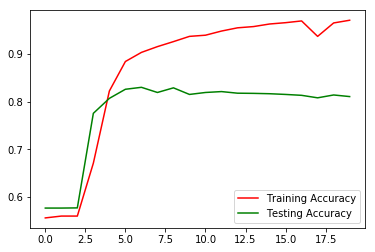

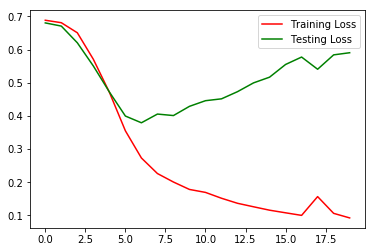

In [0]:
#Evaluating Accuracy and Loss of the model
%matplotlib inline
acc=history2.history['acc']
val_acc=history2.history['val_acc']
loss=history2.history['loss']
val_loss=history2.history['val_loss']

epochs=range(len(acc)) #No. of epochs

#Plot training and validation accuracy per epoch
import matplotlib.pyplot as plt
plt.plot(epochs,acc,'r',label='Training Accuracy')
plt.plot(epochs,val_acc,'g',label='Testing Accuracy')
plt.legend()
plt.figure()

#Plot training and validation loss per epoch
plt.plot(epochs,loss,'r',label='Training Loss')
plt.plot(epochs,val_loss,'g',label='Testing Loss')
plt.legend()
plt.show()